In [44]:
import os
import sys
module_path = os.path.abspath(os.path.join('../src'))
if module_path not in sys.path:
    sys.path.append(module_path)


In [45]:
import vso.util
import vso.data

OBJ_NAME='SZ Lyn'
SESSION_TAG='2025/20250227'
# OBJ_NAME='RZ Lyr'
# SESSION_TAG='20240827'
IMAGE_ROOT = '/srv/public/img'
WORK_ROOT = '/srv/public'

session = vso.util.Session(tag=SESSION_TAG, name=OBJ_NAME)
layout = vso.util.WorkLayout(WORK_ROOT)
session_layout = layout.get_session(session)
settings = vso.util.Settings(session_layout.settings_file_path)

In [46]:
from astropy.table import QTable
ph = QTable.read(session_layout.root_dir / "photometry.ecsv")
stars = set(ph['auid'])
stars.remove('000-BBP-158')

In [53]:
tv = QTable(ph[ph['auid'] == '000-BBP-158']['time', 'airmass', 'instr B', 'instr V'])


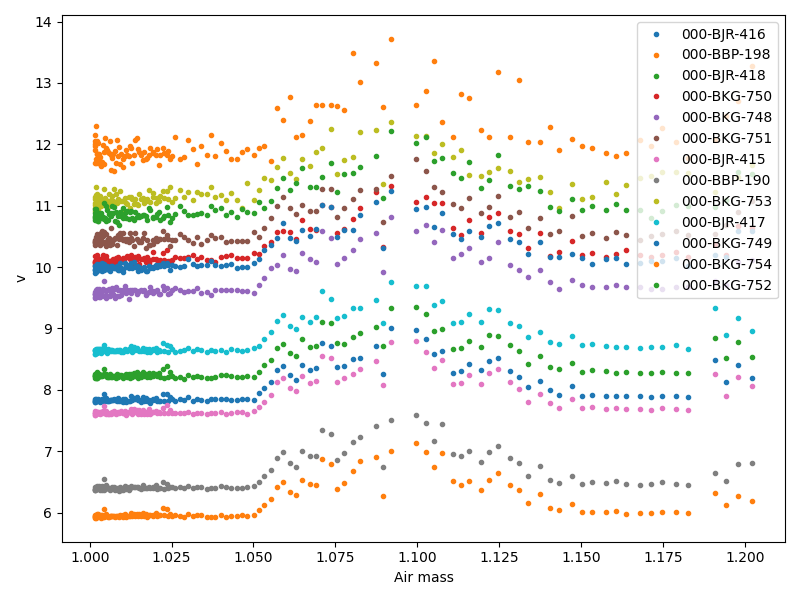

In [55]:
#%matplotlib ipympl

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as sst

band = 'V'

fig = plt.figure(figsize=(8.00, 6.00))
gs = fig.add_gridspec(1, 1)

ax = fig.add_subplot(gs[0, 0])
for auid in stars:
    instr = f'instr {band}'
    t = QTable(ph[ph['auid'] == auid]['time', 'airmass', 'instr B', 'instr V'])
    ax.plot(t['airmass'], t['instr B']['mag'], '.', label=auid)
    ax.set_ylabel(f'{band[0].lower()}')
    ax.set_xlabel('Air mass')
ax.legend()

plt.tight_layout()
plt.show()